In [29]:
import pickle
import json
import funcy
import csv
import os
import gzip
import pandas as pd
import numpy as np


PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset. The principal components, which act as the low-dimensional representation of our data, are simply the coefficients that multiply each of the elements in this series. 

To see what these numbers mean, visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data.

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [30]:
v6 = pd.read_pickle(
    '/pool001/lraymond/processed_data/pre_analysis_dfs/standardized_linear_classifier_df.p')

In [31]:
# first, try to plot it using PCA
from time import time

%matplotlib inline
import matplotlib.pyplot as plt
# import seaborn as sns; sns.set()

from sklearn import decomposition

In [32]:
additional_margins = [ ('10_year_cites_above0', 'SVM_morethan0_vs1'),
                        ('10_year_cites_top50', 'SVM_top50vs_rest',), 
                      ('10_year_cites_top75', 'SVM_top75vs_rest'),
                        ('10_year_cites_top10', 'SVM_top10vs_rest'),
                        ('10_year_cites_top1', 'SVM_top1vs_rest'),
                     ]

In [33]:
v6['10_year_cites'].describe(percentiles=[0, .25, .5, .75, .85, .9, .99, 1])

count    188672.000000
mean         10.280990
std          15.944576
min           0.000000
0%            0.000000
25%           2.000000
50%           6.000000
75%          12.000000
85%          18.000000
90%          23.000000
99%          76.000000
100%        755.000000
max         755.000000
Name: 10_year_cites, dtype: float64

In [34]:
pd.qcut(v6['10_year_cites'], q=[0, .25, .5, .75, .85, .9, .99, 1])[:10]

patent_number
4490860    (-0.001, 2.0]
4490861       (2.0, 6.0]
4490864       (2.0, 6.0]
4490868    (-0.001, 2.0]
4490876    (-0.001, 2.0]
4490896       (2.0, 6.0]
4490898    (-0.001, 2.0]
4490901    (-0.001, 2.0]
4490902       (2.0, 6.0]
4490920    (-0.001, 2.0]
Name: 10_year_cites, dtype: category
Categories (7, interval[float64]): [(-0.001, 2.0] < (2.0, 6.0] < (6.0, 12.0] < (12.0, 18.0] < (18.0, 23.0] < (23.0, 76.0] < (76.0, 755.0]]

In [35]:
v6['10_year_cites_binned'] = pd.qcut(v6['10_year_cites'], q=[0, .25, .5, .75, .85, .9, .99, 1], labels=False)

In [36]:
X_cols = [c for c in v6.columns if '_cites' not in c]
Y_col = '10_year_cites_top1'
X = v6[X_cols].as_matrix()
Y = v6[Y_col].as_matrix()
bins = v6['10_year_cites_binned'].as_matrix()
print(Y.shape, X.shape, bins.shape)

(188672,) (188672, 166) (188672,)


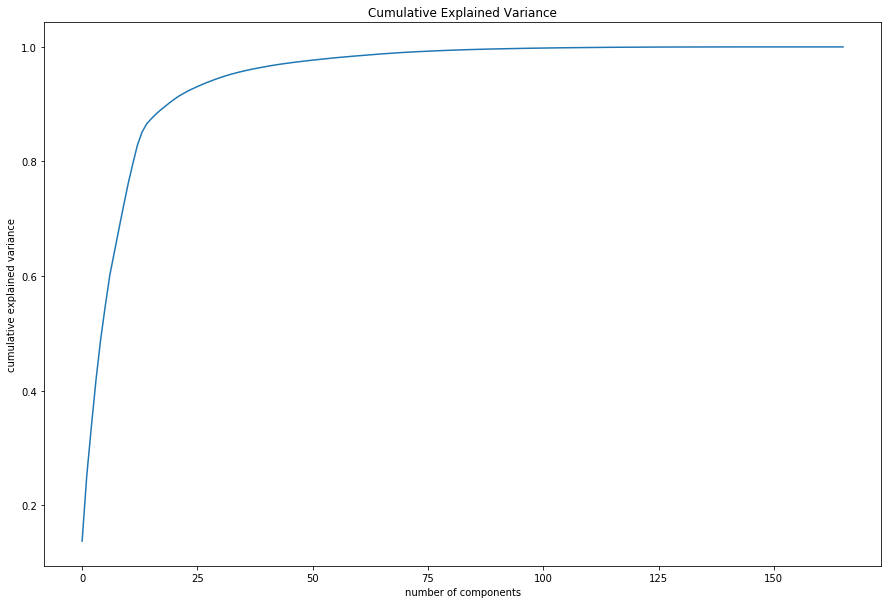

In [11]:
pca = decomposition.PCA().fit(X)
fig = plt.figure(figsize=(15, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Cumulative Explained Variance')
fig.savefig('plots/PCA_explained_var.png')

In [12]:
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X)


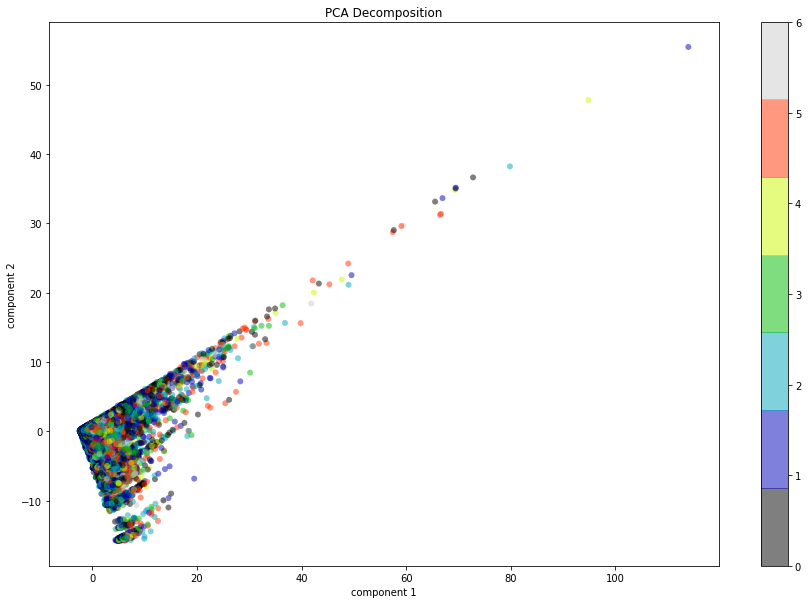

In [13]:
# plot data
fig = plt.figure(figsize=(15, 10))
plt.scatter(X_pca[:,0], X_pca[:,1], c=bins, edgecolor='none', alpha=.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 7))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.title('PCA Decomposition')
plt.show()
fig.savefig('plots/PCA_decomp_binned.png')

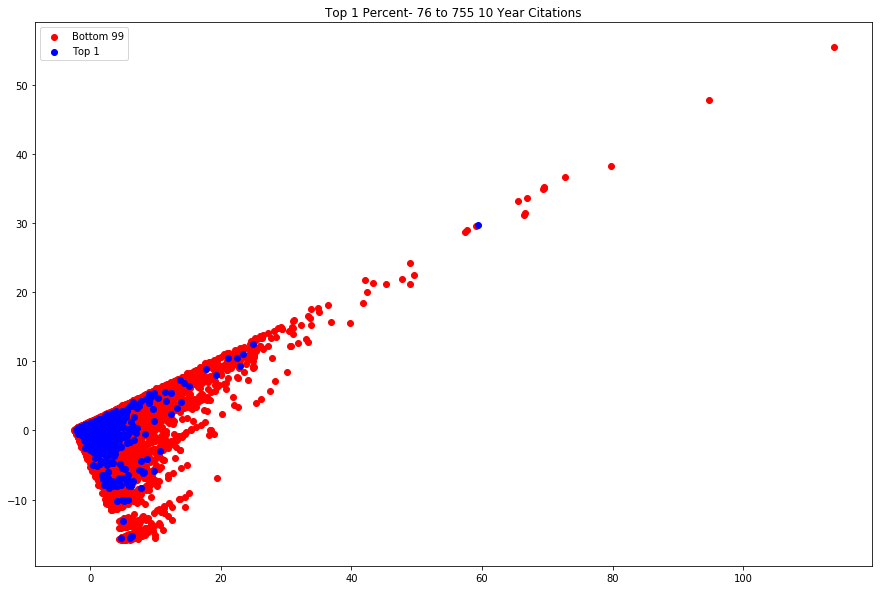

In [14]:
fig = plt.figure(figsize=(15, 10))

plt.scatter(X_pca[Y==0][:, 0], X_pca[Y==0][:, 1], label='Bottom 99', c='red')
plt.scatter(X_pca[Y==1][:, 0], X_pca[Y==1][:, 1], label='Top 1', c='blue')
plt.title('Top 1 Percent- 76 to 755 10 Year Citations')
plt.legend()
plt.show()
fig.savefig('plots/PCA_top1.png')

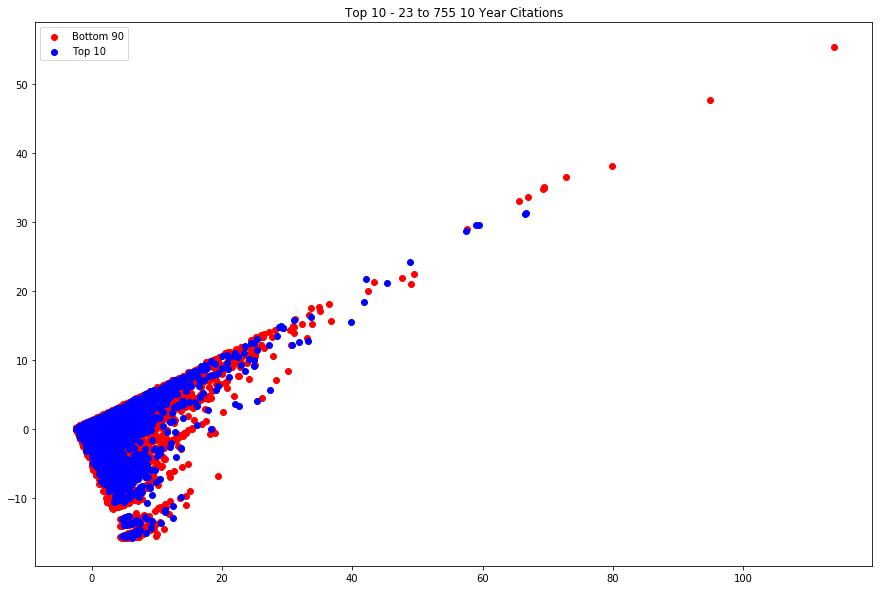

In [15]:
fig = plt.figure(figsize=(15, 10))

plt.scatter(X_pca[bins<5][:, 0], X_pca[bins<5][:, 1], label='Bottom 90', c='red')
plt.scatter(X_pca[bins>=5][:, 0], X_pca[bins>=5][:, 1], label='Top 10', c='blue')
plt.title('Top 10 - 23 to 755 10 Year Citations')
plt.legend()
plt.show()
fig.savefig('plots/PCA_top10.png')

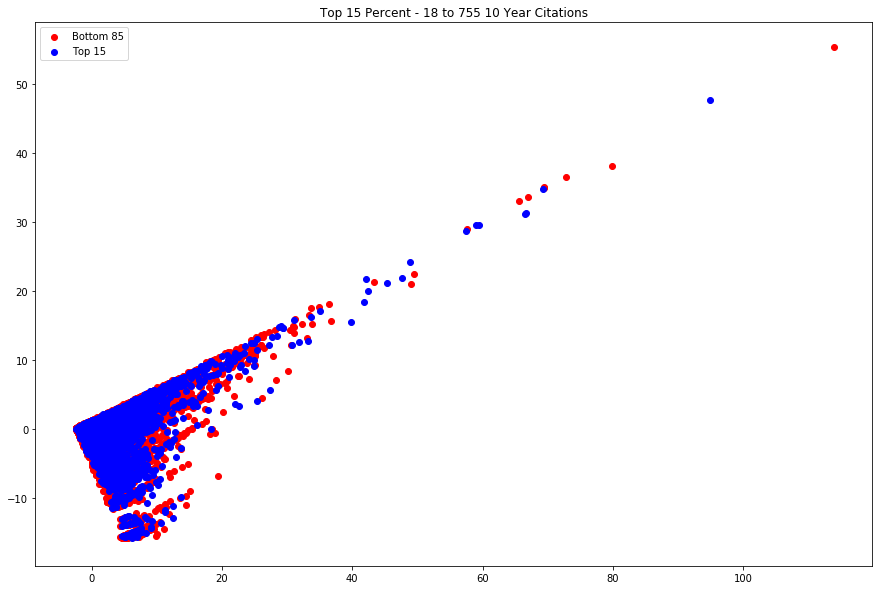

In [16]:
fig = plt.figure(figsize=(15, 10))

plt.scatter(X_pca[bins<4][:, 0], X_pca[bins<4][:, 1], label='Bottom 85', c='red')
plt.scatter(X_pca[bins>=4][:, 0], X_pca[bins>=4][:, 1], label='Top 15', c='blue')
plt.title('Top 15 Percent - 18 to 755 10 Year Citations')
plt.legend()
plt.show()
fig.savefig('plots/PCA_top15.png')

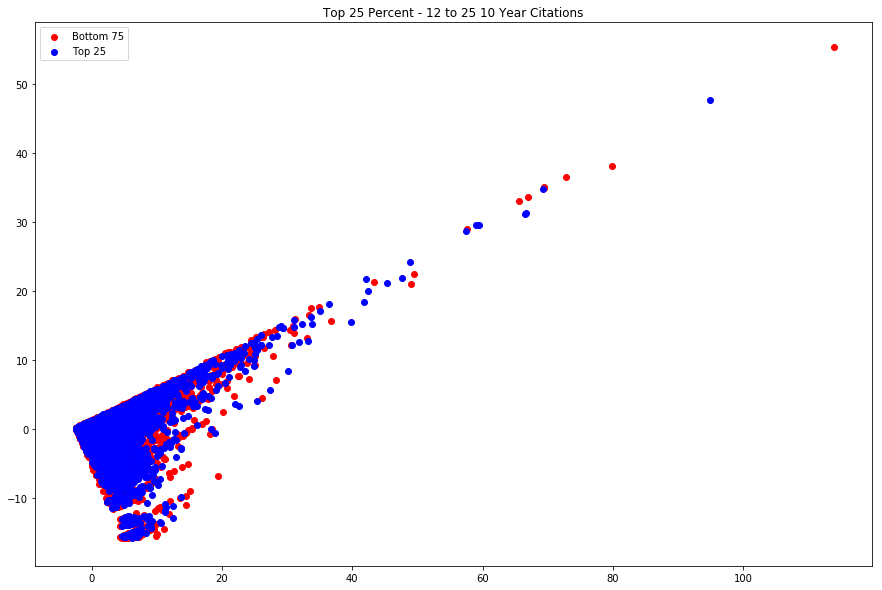

In [17]:
fig = plt.figure(figsize=(15, 10))

plt.scatter(X_pca[bins<3][:, 0], X_pca[bins<3][:, 1], label='Bottom 75', c='red')
plt.scatter(X_pca[bins>=3][:, 0], X_pca[bins>=3][:, 1], label='Top 25', c='blue')
plt.title('Top 25 Percent - 12 to 25 10 Year Citations')
plt.legend()
plt.show()
fig.savefig('plots/PCA_top25.png')

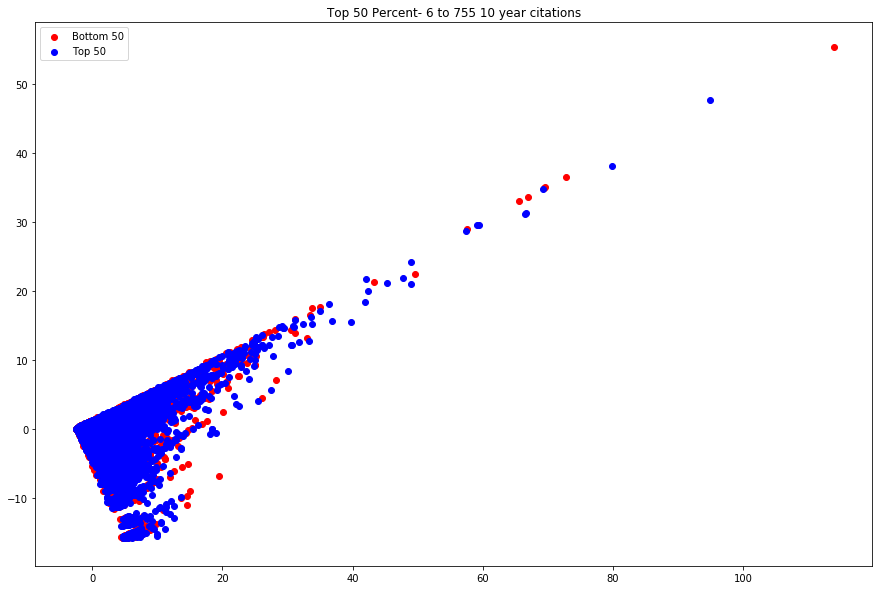

In [18]:
fig = plt.figure(figsize=(15, 10))

plt.scatter(X_pca[bins<2][:, 0], X_pca[bins<2][:, 1], label='Bottom 50', c='red')
plt.scatter(X_pca[bins>=2][:, 0], X_pca[bins>=2][:, 1], label='Top 50', c='blue')
plt.title('Top 50 Percent- 6 to 755 10 year citations')
plt.legend()
plt.show()
fig.savefig('plots/PCA_top50.png')

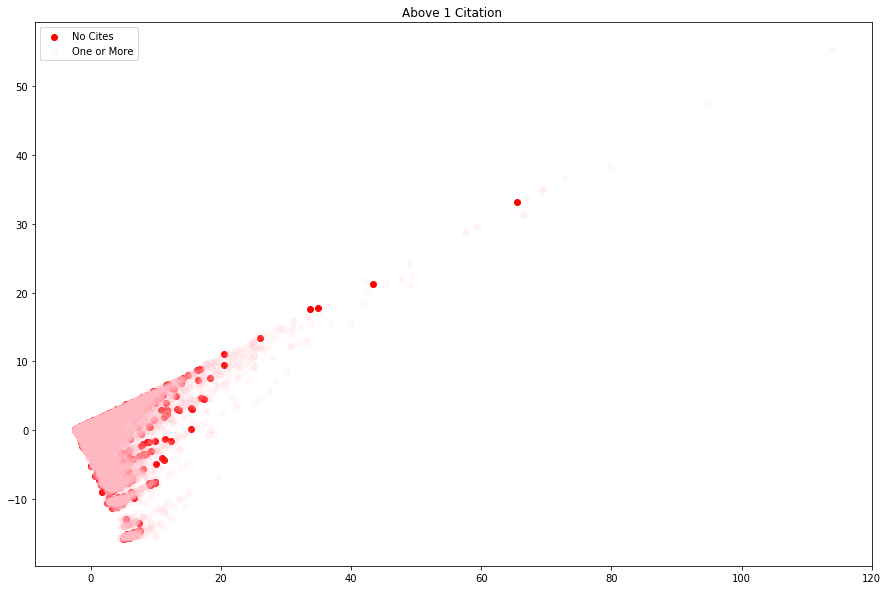

In [19]:
fig = plt.figure(figsize=(15, 10))
above0 = v6['10_year_cites_above0']
plt.scatter(X_pca[above0==0][:, 0], X_pca[above0==0][:, 1], label='No Cites', c='red',)
plt.scatter(X_pca[above0==1][:, 0], X_pca[above0==1][:, 1], label='One or More', c='pink', alpha=.1)
plt.title('Above 1 Citation ')
plt.legend()
plt.show()
fig.savefig('plots/PCA_above0.png')

### T-SNE
Starting with PCA initialization
https://distill.pub/2016/misread-tsne/
PCA initialization cannot be used with precomputed distances and is usually more globally stable than random initialization. 

In [37]:
PERPLEXITY = 30

In [38]:
pca = decomposition.PCA(n_components=50)
X_pca = pca.fit_transform(X)
print(X.shape, X_pca.shape)


(188672, 166) (188672, 50)


In [39]:
from sklearn import manifold

In [ ]:
t0 = time()
fig = plt.figure(figsize=(15, 10))
tsne = manifold.TSNE(n_components=2, random_state=0, perplexity=PERPLEXITY)
X_tsne = tsne.fit_transform(X_pca)
t1 = time()

In [ ]:

print("t-SNE " % (t1 - t0))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.show()
fig.savefig('plots/TSNE_from_PCA.png')

In [ ]:
t0 = time()
fig = plt.figure(figsize=(15, 10))
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0, perplexity=PERPLEXITY)
X_tsne = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.show()
fig.savefig('plots/TSNE.png')

In [ ]:
print("Computing PCA projection")
t0 = time()
X_svd = decomposition.TruncatedSVD(n_components=2).fit_transform(X)

pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
X_pca.shape

In [ ]:
pca.explained_variance_ratio_